# CMSC 197 - MACHINE LEARNING
## HW2
### SUBMITTED BY: RICA EUNICE DORDAS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# %matplotlib inline

In [3]:
data = pd.read_csv("movie_metadata_cleaned.csv")

In [4]:
data.head(2)

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0


## Get the top 10 directors with most movies directed and use a boxplot for their gross earnings

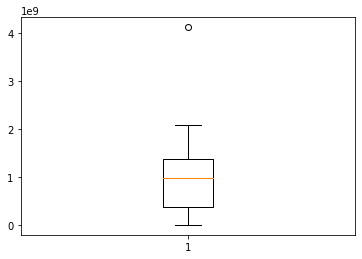

In [5]:
movies_per_director = data.groupby('director_name', as_index=False).count().sort_values(by='movie_title', ascending=False)[['director_name', 'movie_title']]
top10_mostmovies_director=movies_per_director[:10]

gross_per_director = data.groupby('director_name', as_index=False).sum()[['director_name', 'gross']]
top10_director_gross = pd.merge(top10_mostmovies_director, gross_per_director, on='director_name').sort_values("gross", ascending=False)

bp = plt.boxplot(top10_director_gross['gross'])
plt.show()

## Plot the following variables in one graph:

- num_critic_for_reviews
- IMDB score
- gross

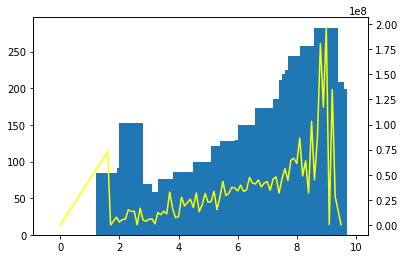

In [6]:
Data_per_IMDB = data.groupby("imdb_score").mean()
Data_per_IMDB[['gross', 'num_critic_for_reviews']]

plt.bar(Data_per_IMDB.index, Data_per_IMDB.num_critic_for_reviews)
average_gross = plt.twinx()
average_gross.plot(Data_per_IMDB['gross'],color='yellow')

## Compute Sales (Gross - Budget), add it as another column

In [7]:
data['sales'] = data['gross'] - data['budget']
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0


## Which directors garnered the most total sales?

In [8]:
most_sales_director = data.groupby("director_name", as_index=False).sum().sort_values(by='sales', ascending=False)
most_sales_director[['director_name', 'sales']][:10]

,director_name,sales
2159,Steven Spielberg,2.451332e+09
765,George Lucas,1.386641e+09
923,James Cameron,1.199626e+09
1219,Joss Whedon,1.000887e+09
335,Chris Columbus,9.417076e+08
1787,Peter Jackson,9.009693e+08
2221,Tim Burton,8.242755e+08
374,Christopher Nolan,8.082276e+08
1158,Jon Favreau,7.693815e+08
695,Francis Lawrence,7.555020e+08


## Plot sales and average likes as a scatterplot. Fit it with a line.

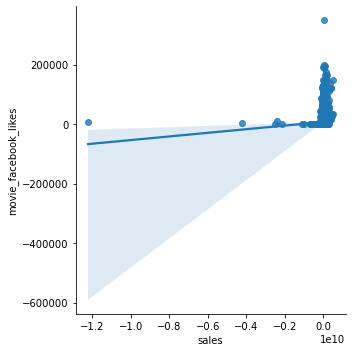

In [9]:
sns.lmplot(x='sales', y='movie_facebook_likes', data=data)

## Which of these genres are the most profitable? Plot their sales using different histograms, superimposed in the same axis.

- Romance
- Comedy
- Action
- Fantasy

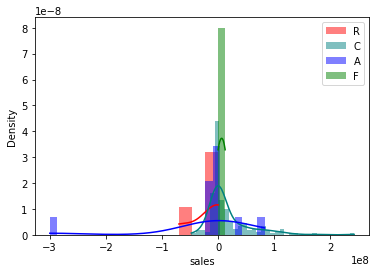

In [10]:
ax = sns.histplot(data[data['genres'] == 'Romance']["sales"], color="red", label="R", kde=True, stat="density", linewidth=0)
sns.histplot(data[data['genres'] == 'Comedy']["sales"], color="teal", label="C", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Action']["sales"], color="blue", label="A", kde=True, stat="density", linewidth=0, ax=ax)
sns.histplot(data[data['genres'] == 'Fantasy']["sales"], color="green", label="F", kde=True, stat="density", linewidth=0, ax=ax)
ax.legend()

## For each of movie, compute average likes of the three actors and store it as a new variable

Read up on the mean function.

Store it as a new column, average_actor_likes.

In [11]:
likes = ['actor_3_facebook_likes','actor_1_facebook_likes', 'actor_2_facebook_likes']
data['average_actor_likes']=data[likes].mean(axis=1)
data

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,...,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000.0,0.0,584.333333
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,...,USA,0,1400.0,2013.0,0.0,6.3,0.00,16.0,-1400.0,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,...,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660.0,10443.0,718.000000
5042,5042,b'My Date with Drew',Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,...,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456.0,84122.0,41.666667


## Copying the whole dataframe

In [12]:
df = data.copy()
df.head()

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000.0,523505847.0,930.333333
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,...,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0.0,9404152.0,15333.333333
2,2,b'Spectre',Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,...,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000.0,-44925825.0,3851.333333
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,...,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000.0,198130642.0,24333.333333
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,...,0,0,0.0,0.0,12.0,7.1,0.00,0.0,0.0,47.666667


## Min-Max Normalization 

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

The min-max approach (often called normalization) rescales the feature to a hard and fast range of [0,1] by subtracting the minimum value of the feature then dividing by the range. We can apply the min-max scaling in Pandas using the .min() and .max() methods.

$$ 
x_{scaled} = \frac{x-x_{min}}{x_{max}-x_{min}}
$$

### Normalize each numeric column (those that have types integer or float) of the copied dataframe (df)

In [13]:
df.dtypes

Unnamed: 0                     int64
movie_title                   object
color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
num_voted_users              float64
cast_total_facebook_likes    float64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
a

In [14]:
float_data = df.select_dtypes(include=[np.float64])
float_columns = float_data.columns

for column in df.columns:
    if column in float_columns:
        df[column] = (float_data[column] - float_data[column].min()) / (float_data[column].max() - float_data[column].min())
df

,Unnamed: 0,movie_title,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,sales,average_actor_likes
0,0,b'Avatar',Color,James Cameron,0.889299,0.941799,0.000000,0.037174,Joel David Moore,0.001563,...,USA,PG-13,1.940158e-02,0.996528,0.006832,0.831579,0.111250,0.094556,1.000000,0.004261
1,1,"b""Pirates of the Caribbean: At World's End""",Color,Gore Verbinski,0.371464,0.894180,0.024478,0.043478,Orlando Bloom,0.062500,...,USA,PG-13,2.455896e-02,0.995536,0.036496,0.747368,0.146875,0.000000,0.959637,0.070229
2,2,b'Spectre',Color,Sam Mendes,0.740467,0.783069,0.000000,0.007000,Rory Kinnear,0.017188,...,UK,PG-13,2.005649e-02,0.999504,0.002869,0.715789,0.146875,0.243553,0.955371,0.017640
3,3,b'The Dark Knight Rises',Color,Christopher Nolan,1.000000,0.867725,0.956522,1.000000,Christian Bale,0.042188,...,USA,PG-13,2.046580e-02,0.998016,0.167883,0.894737,0.146875,0.469914,0.974454,0.111450
4,4,b'Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,0.000000,0.000000,0.005696,0.000000,Rob Walker,0.000205,...,0,0,0.000000e+00,0.000000,0.000088,0.747368,0.000000,0.000000,0.958898,0.000218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,5039,b'The Following ',Color,0,0.052891,0.227513,0.000000,0.013870,Valorie Curry,0.001314,...,USA,TV-14,0.000000e+00,0.000000,0.004328,0.789474,1.000000,0.091691,0.958898,0.002676
5040,5040,b'A Plague So Pleasant',Color,Benjamin Roberds,0.015990,0.402116,0.000000,0.000000,Maxwell Moody,0.000000,...,USA,0,1.146085e-07,0.998512,0.000000,0.663158,0.000000,0.000046,0.958898,0.000000
5041,5041,b'Shanghai Calling',Color,Daniel Hsia,0.017220,0.529101,0.000000,0.021261,Daniel Henney,0.001478,...,USA,PG-13,0.000000e+00,0.998016,0.005248,0.663158,0.146875,0.001891,0.958899,0.003289
5042,5042,b'My Date with Drew',Color,Jon Gunn,0.052891,0.476190,0.000696,0.000696,Brian Herzlinger,0.000134,...,USA,PG,9.004953e-08,0.994048,0.000168,0.694737,0.115625,0.001307,0.958905,0.000191
